<a href="https://colab.research.google.com/github/rponeconsultoria/rponeconsultoria/blob/main/Social_Media_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Importando Libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
#Lendo base de dados
Base_Marketing = pd.read_csv('Viral_Social_Media_Trends.csv')

#Verificando
Base_Marketing.head()


,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,Post_5,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium


In [8]:
#Visualizando medidas
Base_Marketing.describe()

,Views,Likes,Shares,Comments
count,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,2.494066e+06,251475.029800,50519.562000,24888.393800
std,1.459490e+06,144349.583384,29066.362671,14284.504319
min,1.266000e+03,490.000000,52.000000,18.000000
25%,1.186207e+06,126892.250000,25029.000000,12305.250000
50%,2.497373e+06,249443.000000,50839.500000,25004.000000
75%,3.759781e+06,373970.750000,75774.250000,37072.750000
max,4.999430e+06,499922.000000,99978.000000,49993.000000


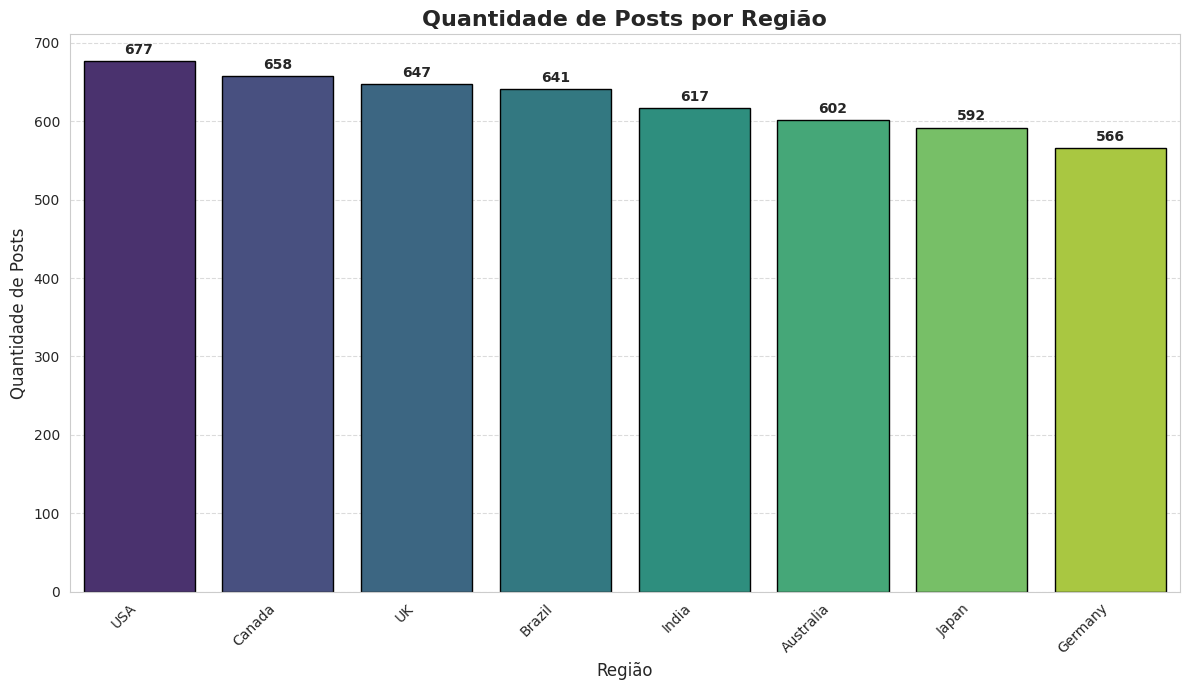

In [26]:
# Conta o número de posts por Região
posts_por_regiao = Base_Marketing['Region'].value_counts().reset_index()
posts_por_regiao.columns = ['Region', 'Qtd_Posts']

# Ordena pela quantidade de posts
posts_por_regiao = posts_por_regiao.sort_values('Qtd_Posts', ascending=False)

# Define o estilo
sns.set_style("whitegrid")
sns.set_palette("viridis")

# Faz o gráfico
plt.figure(figsize=(12, 7))
barplot = sns.barplot(
    data=posts_por_regiao,
    x='Region',
    y='Qtd_Posts',
    palette='viridis',
    edgecolor='black'
)

# Adiciona rótulos de valor acima das barras
for p in barplot.patches:
    barplot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center', va = 'center',
        xytext = (0, 8),
        textcoords = 'offset points',
        fontsize=10,
        fontweight='bold'
    )

plt.title('Quantidade de Posts por Região', fontsize=16, fontweight='bold')
plt.xlabel('Região', fontsize=12)
plt.ylabel('Quantidade de Posts', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

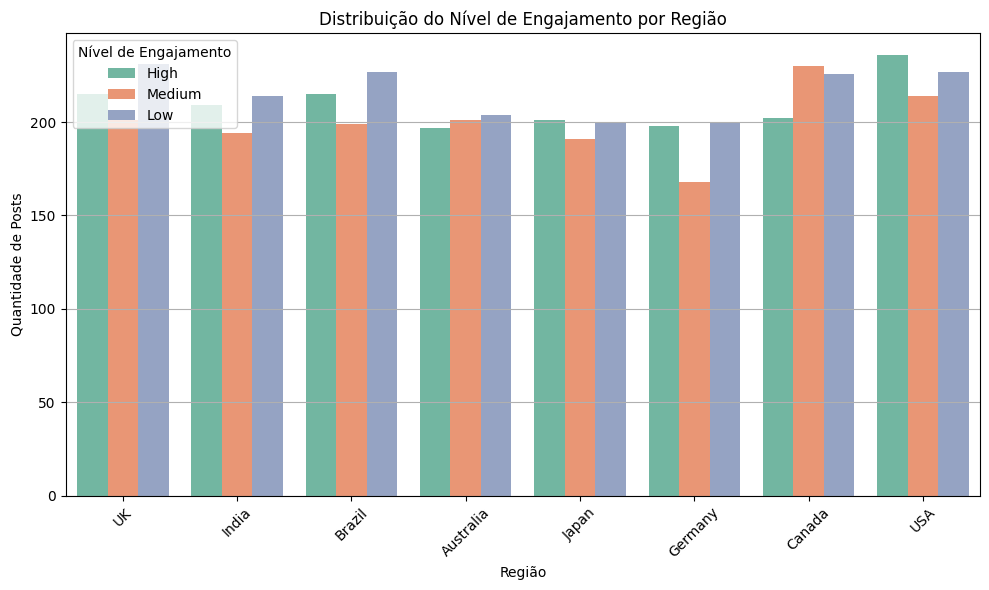

In [21]:
#Níveis de engajamento x região
plt.figure(figsize=(10,6))
sns.countplot(data=Base_Marketing, x='Region', hue='Engagement_Level', palette='Set2')

plt.title('Distribuição do Nível de Engajamento por Região')
plt.xlabel('Região')
plt.ylabel('Quantidade de Posts')
plt.legend(title='Nível de Engajamento')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

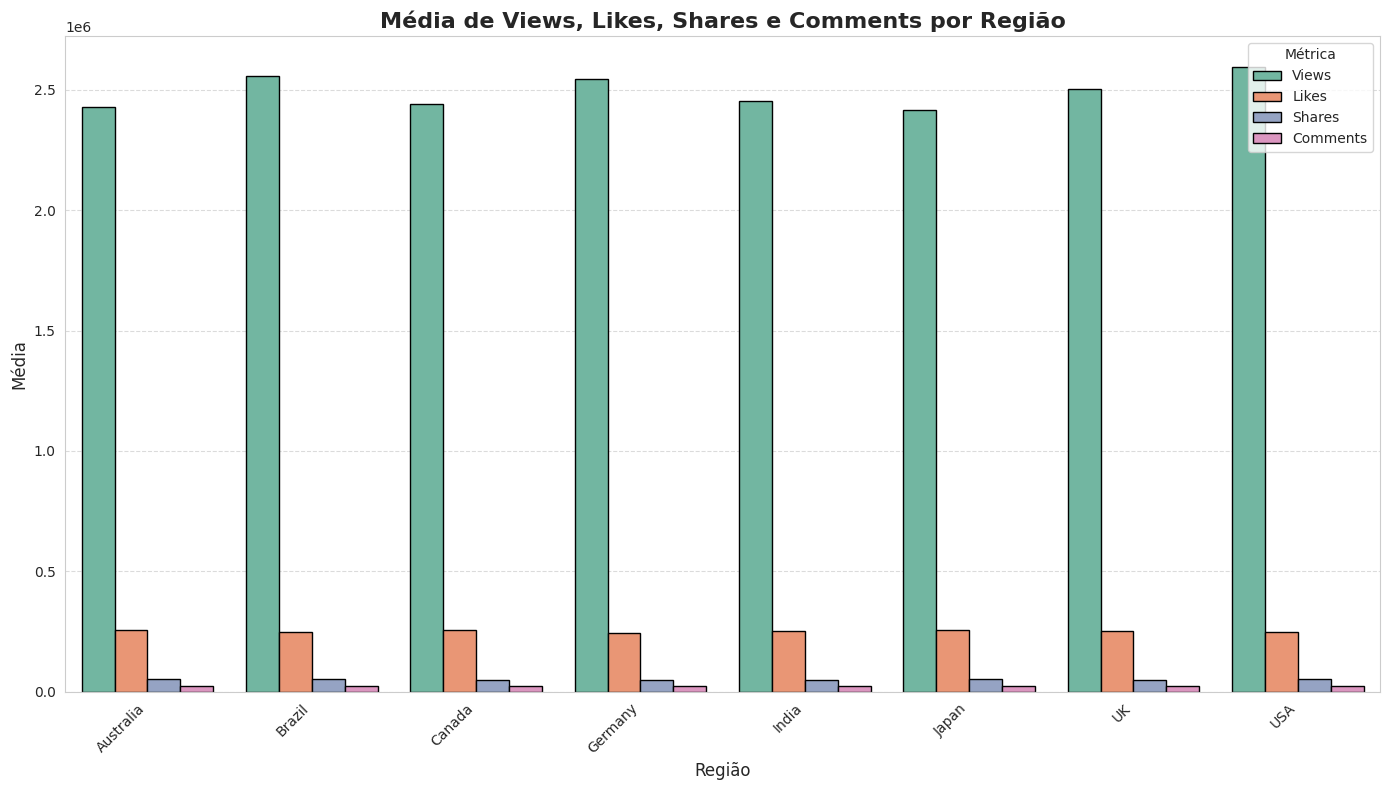

In [63]:
# Agrupa por Região e calcula as médias
media_engajamento = Base_Marketing.groupby('Region')[['Views', 'Likes', 'Shares', 'Comments']].mean().reset_index()

# Converte para formato "long" para facilitar a plotagem
media_engajamento_melted = media_engajamento.melt(id_vars='Region', var_name='Métrica', value_name='Média')

# Estilo
sns.set_style("whitegrid")
sns.set_palette("Set2")

# Faz o gráfico
plt.figure(figsize=(14,8))
barplot = sns.barplot(
    data=media_engajamento_melted,
    x='Region',
    y='Média',
    hue='Métrica',
    edgecolor='black'
)

plt.title('Média de Views, Likes, Shares e Comments por Região', fontsize=16, fontweight='bold')
plt.xlabel('Região', fontsize=12)
plt.ylabel('Média', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Métrica')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


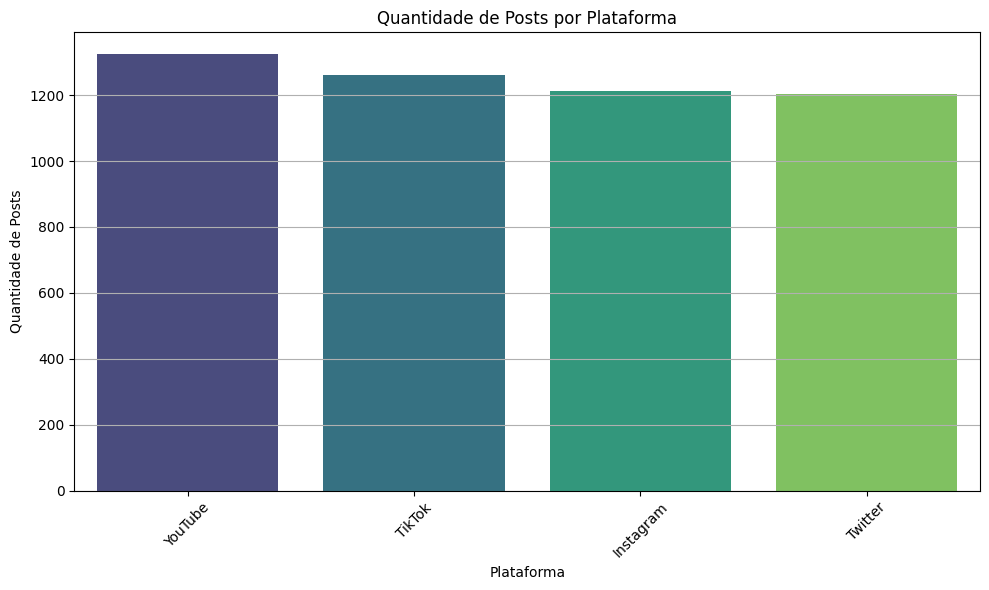

In [19]:
# Conta o número de posts por plataforma
posts_por_plataforma = Base_Marketing['Platform'].value_counts().reset_index()
posts_por_plataforma.columns = ['Platform', 'Post_ID']

# Faz o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=posts_por_plataforma, x='Platform', y='Post_ID', palette='viridis')

plt.title('Quantidade de Posts por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Quantidade de Posts')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


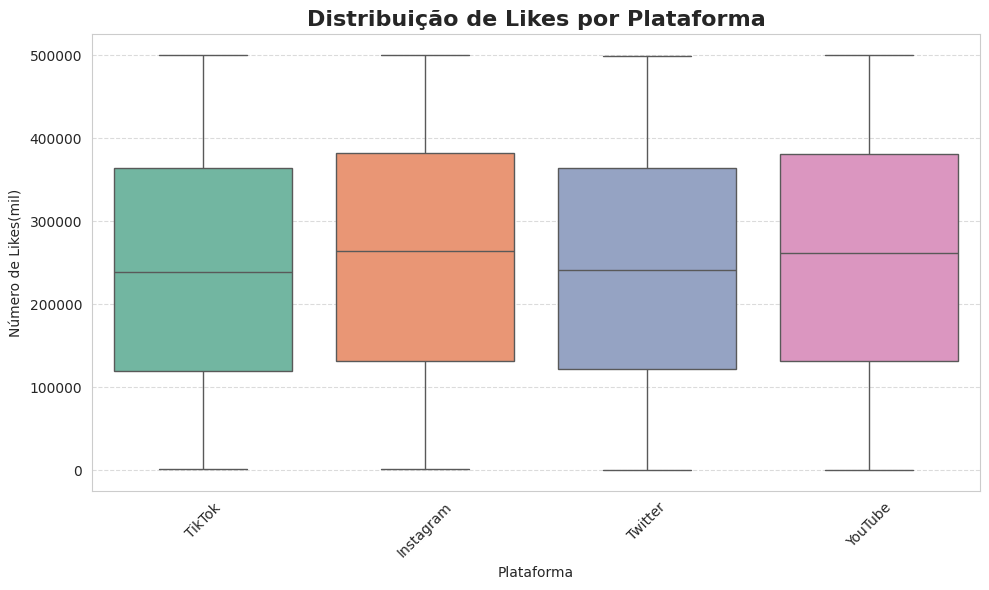

In [61]:
# Boxplot Likes por Plataforma
plt.figure(figsize=(10, 6))
sns.boxplot(data=Base_Marketing, x='Platform', y='Likes', palette='Set2')
plt.title('Distribuição de Likes por Plataforma', fontsize=16, fontweight='bold')
plt.xlabel('Plataforma')
plt.ylabel('Número de Likes(mil)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


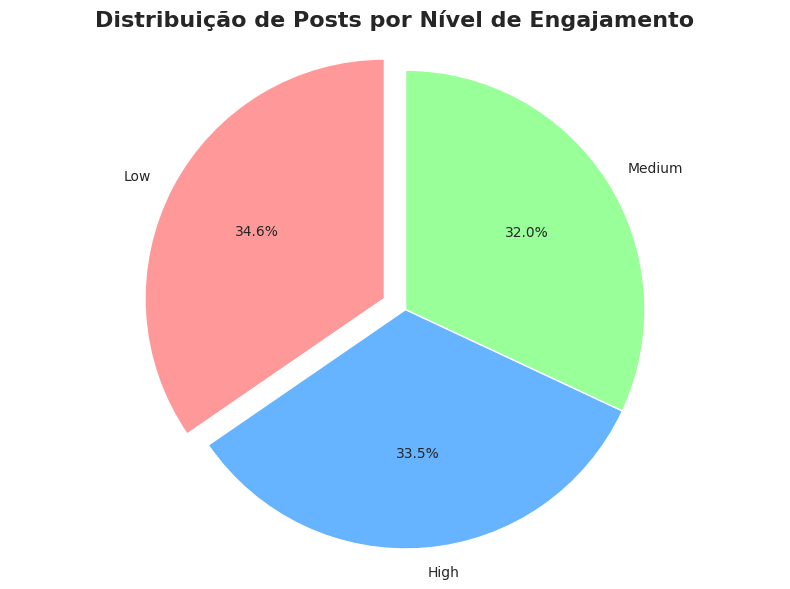

In [57]:
# Gráfico de Pizza para Engagement Level
engagement_counts = Base_Marketing['Engagement_Level'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(engagement_counts, labels=engagement_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'], startangle=90, explode=(0.1, 0, 0))
plt.title('Distribuição de Posts por Nível de Engajamento', fontsize=16, fontweight='bold')
plt.axis('equal')  # Torna o gráfico de pizza circular
plt.tight_layout()
plt.show()


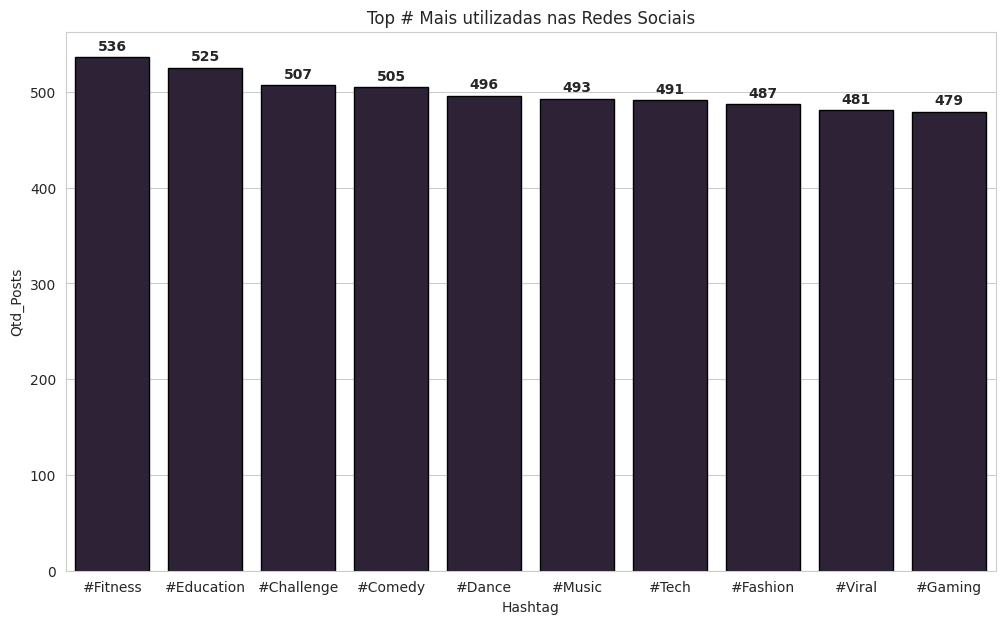

In [36]:
# Conta o número de vezes que cada hashtag aparece
hashtags_contagem = Base_Marketing['Hashtag'].value_counts().reset_index()
hashtags_contagem.columns = ['Hashtag', 'Qtd_Posts']
hashtags_contagem = hashtags_contagem.sort_values('Qtd_Posts', ascending=False)

# Estilo
sns.set_style("whitegrid")
sns.set_palette("mako")

# Faz o gráfico
plt.figure(figsize=(12,7))
plt.title('Top # Mais utilizadas nas Redes Sociais')
barplot = sns.barplot(data=hashtags_contagem, x='Hashtag', y='Qtd_Posts', edgecolor='black')

# Adiciona rótulos de valor
for p in barplot.patches:
    barplot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0,8),
        textcoords='offset points',
        fontsize=10,
        fontweight='bold')


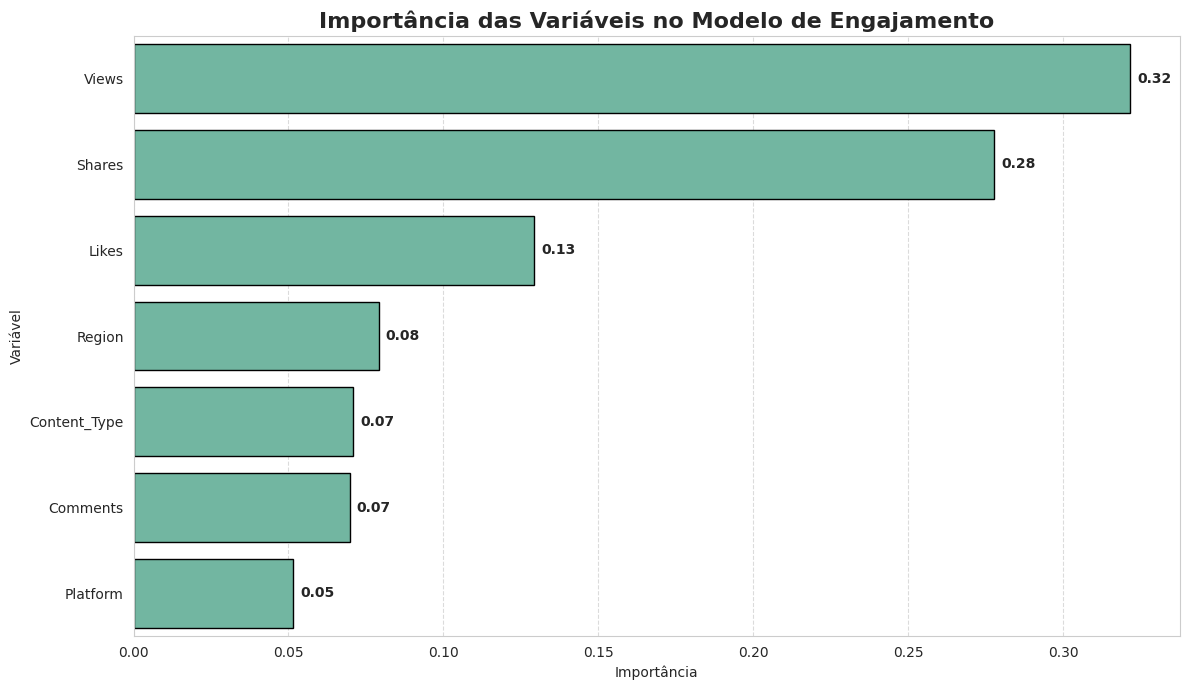

In [40]:
#Decision Tree - Fator Engajamento

# Obtém as importâncias das features
importancias = model.feature_importances_
features = X.columns

# Cria um DataFrame para organizar
importancia_df = pd.DataFrame({
    'Feature': features,
    'Importance': importancias
}).sort_values(by='Importance', ascending=False)

# Estilo
sns.set_style("whitegrid")
sns.set_palette("Set2")

# Gráfico
plt.figure(figsize=(12, 7))
barplot = sns.barplot(data=importancia_df, x='Importance', y='Feature', edgecolor='black')

# Adiciona os valores na barra
for p in barplot.patches:
    barplot.annotate(
        f"{p.get_width():.2f}",
        (p.get_width(), p.get_y() + p.get_height() / 2),
        ha='left', va='center',
        xytext=(5,0),
        textcoords='offset points',
        fontsize=10,
        fontweight='bold'
    )

plt.title('Importância das Variáveis no Modelo de Engajamento', fontsize=16, fontweight='bold')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Acurácia do Modelo: 0.32

Relatório de Classificação:

              precision    recall  f1-score   support

        High       0.24      0.03      0.05       349
         Low       0.33      0.85      0.47       334
      Medium       0.33      0.10      0.15       317

    accuracy                           0.32      1000
   macro avg       0.30      0.32      0.22      1000
weighted avg       0.30      0.32      0.22      1000



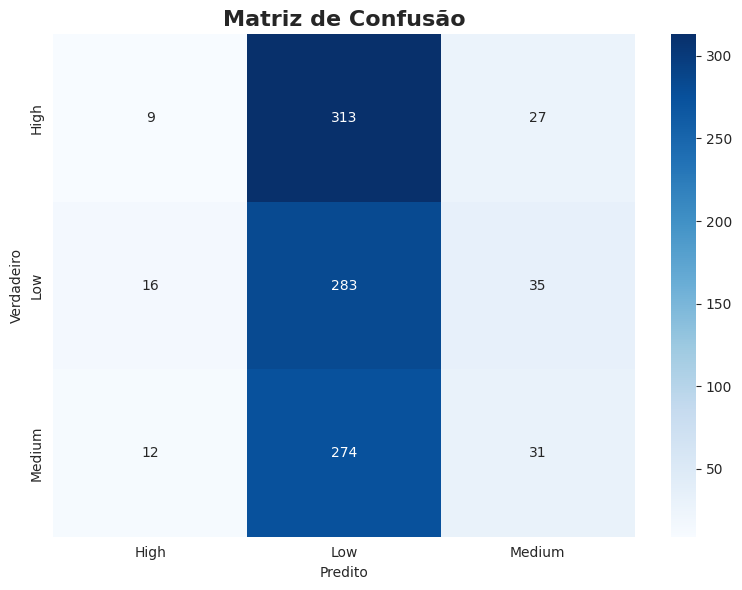

In [43]:
# Faz previsões no conjunto de teste
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Import necessary functions

y_pred = model.predict(X_test)

# Calcula a acurácia geral
acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia do Modelo: {acuracia:.2f}")

# Exibe o relatório completo (Precision, Recall, F1-Score)
relatorio = classification_report(y_test, y_pred, target_names=le.classes_)
print("\nRelatório de Classificação:\n")
print(relatorio)

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plot da matriz de confusão
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusão', fontsize=16, fontweight='bold')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.tight_layout()
plt.show()

Acurácia do Random Forest: 0.31

Relatório de Classificação:

              precision    recall  f1-score   support

        High       0.33      0.31      0.32       349
         Low       0.31      0.45      0.36       334
      Medium       0.29      0.17      0.21       317

    accuracy                           0.31      1000
   macro avg       0.31      0.31      0.30      1000
weighted avg       0.31      0.31      0.30      1000



<Axes: >

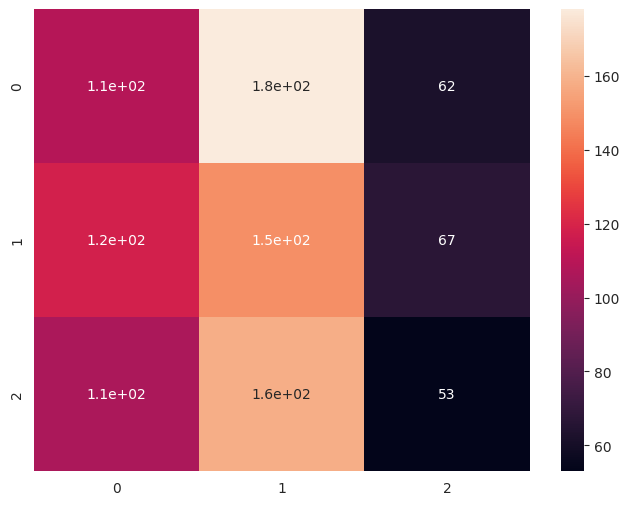

In [46]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# (Re)Prepara os dados
Base = Base_Marketing.copy()

# Codifica variáveis categóricas
le = LabelEncoder()
for col in ['Platform', 'Content_Type', 'Region']:
    Base[col] = le.fit_transform(Base[col])

# Define variáveis X (features) e y (target)
X = Base[['Views', 'Likes', 'Shares', 'Comments', 'Platform', 'Content_Type', 'Region']]
y = Base['Engagement_Level']

# Codifica o target também
y = le.fit_transform(y)

# Divide em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cria e treina o Random Forest
model_rf = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)
model_rf.fit(X_train, y_train)

# Faz previsões
y_pred_rf = model_rf.predict(X_test)

# Avaliação do modelo
acuracia_rf = accuracy_score(y_test, y_pred_rf)
print(f"Acurácia do Random Forest: {acuracia_rf:.2f}")

print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

# Matriz de confusão
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8,6))
sns.heatmap(cm_rf, annot=True)
